# ANZ Virtual Internship Report
## Task 2 : Predective Analytics 

###  Load dependencies :

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

###  Loading Dataset :

In [2]:
df = pd.read_excel("ANZ_DATASET.xlsx")
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


###  Salary transaction for each costumer :

In [3]:
salary_trans = df[df['txn_description']=='PAY/SALARY']
pos_sales = df[(df['txn_description']=='POS') | (df['txn_description']=='SALES-POS')]

In [4]:
def group_by(data, columns):

    return data.groupby(columns).size().to_frame('count').reset_index()

In [5]:
customers = group_by(salary_trans,['customer_id'])

###  Annual Salary, Annual balance & Annual Spending for each costumer :

In [6]:
annual_salary=[]
age=[]
annual_balance=[]
annual_spending=[]

for i in customers['customer_id'].values:
    salary_for_user = salary_trans[salary_trans['customer_id']==i]
    annual_salary.append(salary_for_user[['amount','age','customer_id','first_name','date','balance']]['amount'].values.sum())
    age.append(salary_for_user[['amount','age','customer_id','first_name','date','balance']]['age'].iloc[0])
    annual_balance.append(salary_for_user[['amount','age','customer_id','first_name','date','balance']]['balance'].values.sum())
    spending = pos_sales[pos_sales['customer_id']==i]
    annual_spending.append(spending['amount'].values.sum())
    
annual_salary = np.array(annual_salary).reshape(-1,1)
age = np.array(age).reshape(-1,1)
annual_balance = np.array(annual_balance).reshape(-1,1)
annual_spending = np.array(annual_spending).reshape(-1,1)

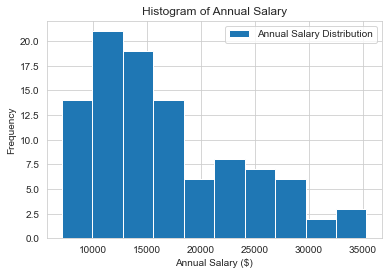

In [7]:
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots()
    ax.hist(annual_salary)
    ax.set_title('Histogram of Annual Salary')
    ax.set_xlabel('Annual Salary ($)')
    ax.set_ylabel('Frequency')
    ax.legend(['Annual Salary Distribution'])
    plt.show()

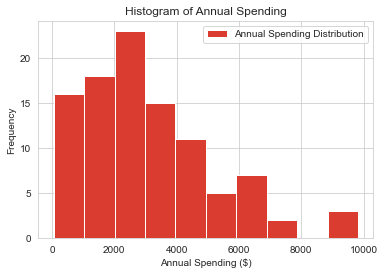

In [8]:
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots()
    ax.hist(annual_spending,  color='#db3c30')
    ax.set_title('Histogram of Annual Spending')
    ax.set_xlabel('Annual Spending ($)')
    ax.set_ylabel('Frequency')
    ax.legend(['Annual Spending Distribution'])
    plt.show()

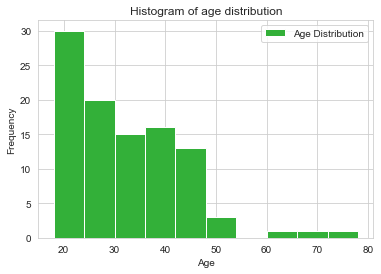

In [9]:
with sns.axes_style("whitegrid"):
    fig, ax = plt.subplots()
    ax.hist(age,  color='#33b039')
    ax.set_title('Histogram of age distribution')
    ax.set_xlabel('Age')
    ax.set_ylabel('Frequency')
    ax.legend(['Age Distribution'])
    plt.show()

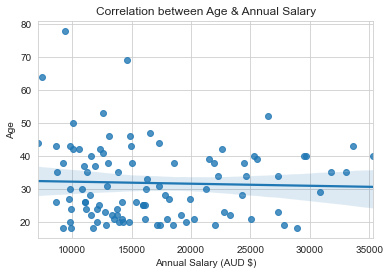

In [10]:
with sns.axes_style("whitegrid"):
    sns.regplot(x=annual_salary, y=age, data=df)
    plt.title('Correlation between Age & Annual Salary')
    plt.xlabel('Annual Salary (AUD $)')
    plt.ylabel('Age')
    plt.show()

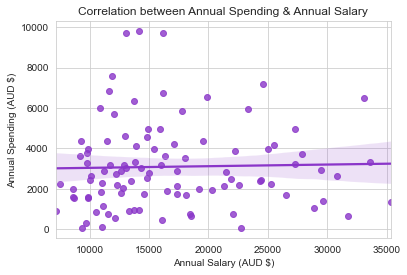

In [11]:
with sns.axes_style("whitegrid"):
    sns.regplot(x=annual_salary, y=annual_spending, color='#8a36c9', data=df)
    plt.title('Correlation between Annual Spending & Annual Salary')
    plt.xlabel('Annual Salary (AUD $)')
    plt.ylabel('Annual Spending (AUD $)')
    plt.show()

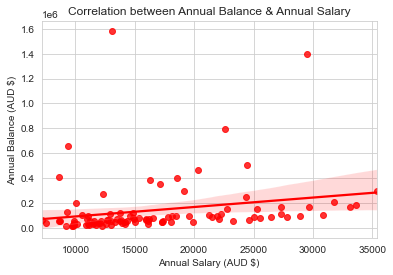

In [12]:
with sns.axes_style("whitegrid"):
    sns.regplot(x=annual_salary, y=annual_balance, color='red', data=df)
    plt.title('Correlation between Annual Balance & Annual Salary')
    plt.xlabel('Annual Salary (AUD $)')
    plt.ylabel('Annual Balance (AUD $)')
    plt.show()

### Data Normalization (Linear Model) :

In [13]:
scaled_annual_salary=[]
scaler = MinMaxScaler(feature_range=(0, 100))
scaler.fit(annual_salary)
for i in annual_salary:
    scaled_annual_salary.append(scaler.transform([[i[0]]])[0][0])

scaled_annual_salary=np.array(scaled_annual_salary).reshape(-1,1)

scaled_annual_balance=[]
scaler = MinMaxScaler(feature_range=(0, 100))
scaler.fit(annual_balance)
for i in annual_balance:
    scaled_annual_balance.append(scaler.transform([[i[0]]])[0][0])

scaled_annual_balance=np.array(scaled_annual_balance).reshape(-1,1)

scaled_annual_spending=[]
scaler = MinMaxScaler(feature_range=(0, 100))
scaler.fit(annual_spending)
for i in annual_spending:
    scaled_annual_spending.append(scaler.transform([[i[0]]])[0][0])

scaled_annual_spending=np.array(scaled_annual_spending).reshape(-1,1)

scaled_age=[]
scaler = MinMaxScaler(feature_range=(0, 100))
scaler.fit(age)
for i in age:
    scaled_age.append(scaler.transform([[i[0]]])[0][0])

scaled_age=np.array(scaled_age).reshape(-1,1)

###  Linear Regression Model :

#### - Age Vs Annual Salary :

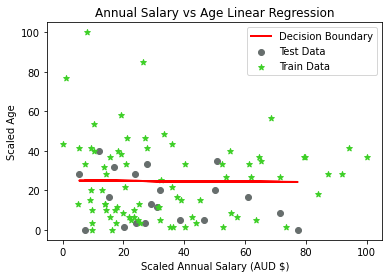

Mean Absolute Error: 13.39
Mean Squared Error: 231.82
Root Mean Squared Error: 15.23


In [14]:
X_train, X_test, y_train, y_test = train_test_split(scaled_annual_salary, scaled_age, test_size=0.2, random_state=0)

model = LinearRegression().fit(X_train, y_train)
y_valid = model.predict(X_test)

fig, ax = plt.subplots()
ax.set_xlabel("Scaled Annual Salary (AUD $)")
ax.set_ylabel("Scaled Age")
ax.set_title('Annual Salary vs Age Linear Regression')
ax.scatter(X_test, y_test,  color='#676e6d', marker='o', label='Test Data')
ax.scatter(X_train, y_train,  color='#3ccf25', marker='*', label='Train Data')
ax.plot(X_test, y_valid, color='red', linewidth=2, label='Decision Boundary')
ax.legend(loc='upper right')
plt.show()

print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_valid),2))  
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_valid),2))  
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_valid)),2))

#### - Annual Balance Vs Annual Salary :

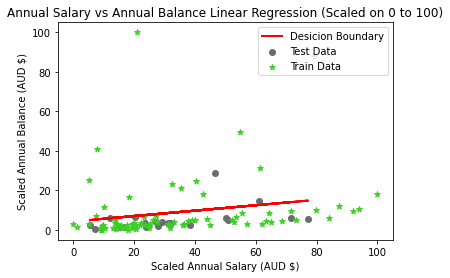

Mean Absolute Error: 5.46
Mean Squared Error: 43.29
Root Mean Squared Error: 6.58


In [15]:
X_train, X_test, y_train, y_test = train_test_split(scaled_annual_salary, scaled_annual_balance, test_size=0.2, random_state=0)

model = LinearRegression().fit(X_train, y_train)
y_valid = model.predict(X_test)

fig, ax = plt.subplots()
ax.set_xlabel("Scaled Annual Salary (AUD $)")
ax.set_ylabel("Scaled Annual Balance (AUD $)")
ax.set_title('Annual Salary vs Annual Balance Linear Regression (Scaled on 0 to 100)')
ax.scatter(X_test, y_test,  color='#676e6d', marker='o', label='Test Data')
ax.scatter(X_train, y_train,  color='#3ccf25', marker='*', label='Train Data')
ax.plot(X_test, y_valid, color='red', linewidth=2, label='Desicion Boundary')
ax.legend(loc='upper right')
plt.show()

print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_valid),2))  
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_valid),2))  
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_valid)),2))

#### - Annual Spending Vs Annual Salary :

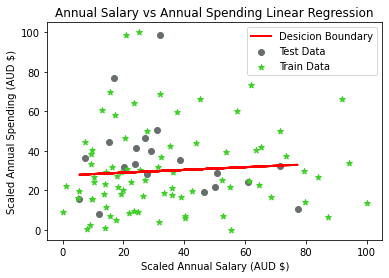

Mean Absolute Error: 15.12
Mean Squared Error: 489.82
Root Mean Squared Error: 22.13


In [16]:
X_train, X_test, y_train, y_test = train_test_split(scaled_annual_salary, scaled_annual_spending, test_size=0.2, random_state=0)

model = LinearRegression().fit(X_train, y_train)
y_valid = model.predict(X_test)

fig, ax = plt.subplots()
ax.set_xlabel("Scaled Annual Salary (AUD $)")
ax.set_ylabel("Scaled Annual Spending (AUD $)")
ax.set_title('Annual Salary vs Annual Spending Linear Regression')
ax.scatter(X_test, y_test,  color='#676e6d', marker='o', label='Test Data')
ax.scatter(X_train, y_train,  color='#3ccf25', marker='*', label='Train Data')
ax.plot(X_test, y_valid, color='red', linewidth=2, label='Desicion Boundary')
ax.legend(loc='upper right')
plt.show()

print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_valid),2))  
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_valid),2))  
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_valid)),2))

The graphs above, shows the distribution of the data and also show that the variables do not correlate with each other, so building a linear regression model will not give good results. However, we can perform classification by using the decision tree classifier.

###  Data Normalization (Decision Tree) :

- In order to build a decision tree model, we want to be able to rank the data based on the data and as a result I decided to incorporate percentiles for each of the features.


- The decision tree classifier is a supervised learning algorithm so due to that I needed to classify the training data as well. This was done by using the percentiles and dividing them into high, medium and low classes which are then in combination labelled as either being a healthy or unhealthy account.


- The accuracy that the decision tree model has achieved is of 90%.

In [17]:
annual_salary=[]
age=[]
annual_balance=[]
annual_spending=[]

for i in customers['customer_id'].values:
    salary_for_user = salary_trans[salary_trans['customer_id']==i]
    annual_salary.append(salary_for_user[['amount','age','customer_id','first_name','date','balance']]['amount'].values.sum())
    age.append(salary_for_user[['amount','age','customer_id','first_name','date','balance']]['age'].iloc[0])
    annual_balance.append(salary_for_user[['amount','age','customer_id','first_name','date','balance']]['balance'].values.sum())
    spending = pos_sales[pos_sales['customer_id']==i]
    annual_spending.append(spending['amount'].values.sum())

In [18]:
scaled_annual_salary=[]
annual_salary_np=np.array(annual_salary).reshape(-1,1)
scaler = MinMaxScaler(feature_range=(0, 100))
scaler.fit(annual_salary_np)
for i in annual_salary:
    scaled_annual_salary.append(scaler.transform([[i]])[0][0])

scaled_annual_balance=[]
annual_balance_np=np.array(annual_balance).reshape(-1,1)
scaler = MinMaxScaler(feature_range=(0, 100))
scaler.fit(annual_balance_np)
for i in annual_balance:
    scaled_annual_balance.append(scaler.transform([[i]])[0][0])

scaled_annual_spending=[]
annual_spending_np=np.array(annual_spending).reshape(-1,1)
scaler = MinMaxScaler(feature_range=(0, 100))
scaler.fit(annual_spending_np)
for i in annual_spending:
    scaled_annual_spending.append(scaler.transform([[i]])[0][0])

In [19]:
anz_dataframe = pd.DataFrame({'annual_salary':annual_salary,'annual_balance':annual_balance,'annual_spending':annual_spending, 'scaled_annual_salary':scaled_annual_salary, 'scaled_annual_balance':scaled_annual_balance, 'scaled_annual_spending':scaled_annual_spending})

#### - Function to calculate "Annual Salary Percentile" :

In [20]:
def annual_salary_percentile(annual_salary, annual_salary_list):
    annual_salary_percentiles=np.percentile(annual_salary_list,[10,20,30,40,50,60,70,80,90,100])
    percentile=0
    for i,val  in enumerate(annual_salary_percentiles):
        if annual_salary>val:
            percentile=i
    annual_salary_percentiles[percentile]
    percentile=(percentile+1)*10
    return percentile

#### - Function to calculate "Annual Balance Percentile" :

In [21]:
def annual_balance_percentile(annual_balance, annual_balance_list):
    annual_balance_percentiles=np.percentile(annual_balance_list,[10,20,30,40,50,60,70,80,90,100])
    percentile=0
    for i,val  in enumerate(annual_balance_percentiles):
        if annual_balance>val:
            percentile=i
    annual_balance_percentiles[percentile]
    percentile=(percentile+1)*10
    return percentile

#### - Function to calculate "Annual Spending Percentile" :

In [22]:
def annual_spending_percentile(annual_spending, annual_spending_list):
    annual_spending_percentiles=np.percentile(annual_spending_list,[10,20,30,40,50,60,70,80,90,100])
    percentile=0
    for i,val  in enumerate(annual_spending_percentiles):
        if annual_spending>val:
            percentile=i
    annual_spending_percentiles[percentile]
    percentile=(percentile+1)*10
    return percentile

#### - Function to perform classification :

In [23]:
def classification(data):

    if data['annual_salary_percentile']>=80 and data['annual_salary_percentile']<=100:
        salary_state='high'
    elif data['annual_salary_percentile']>=60 and data['annual_salary_percentile']<=79:
        salary_state='medium'
    elif data['annual_salary_percentile']>=0 and data['annual_salary_percentile']<=59:        
        salary_state='low'
    else:
        salary_state='low'
        
    if data['annual_balance_percentile']>=80 and data['annual_balance_percentile']<=100:
        balance_state='high'
    elif data['annual_balance_percentile']>=60 and data['annual_balance_percentile']<=79:
        balance_state='medium'
    elif data['annual_balance_percentile']>=0 and data['annual_balance_percentile']<=59:        
        balance_state='low'
    else:
        balance_state='low'
    
    if data['annual_spending_percentile']>=80 and data['annual_spending_percentile']<=100:
        spending_state='high'
    elif data['annual_spending_percentile']>=60 and data['annual_spending_percentile']<=79:
        spending_state='medium'
    elif data['annual_spending_percentile']>=0 and data['annual_spending_percentile']<=59:        
        spending_state='low'
    else:
        spending_state='low'
    
    if salary_state=='high' and balance_state=='low' and spending_state=='high':
        return 'healthy'
    elif salary_state=='low' and balance_state=='high' and spending_state=='low':    
        return 'healthy'
    elif salary_state=='high' and balance_state=='high' and spending_state=='low':
        return 'healthy'
    elif salary_state=='low' and balance_state=='low' and spending_state=='high':
        return 'unhealthy'
    elif salary_state=='low' and balance_state=='low' and spending_state=='low':
        return 'unhealthy'
    elif salary_state=='high' and balance_state=='high' and spending_state=='high':
        return 'unhealthy'
    else:
        return 'unhealthy'

In [24]:
anz_dataframe['annual_salary_percentile']=anz_dataframe['scaled_annual_salary'].apply(annual_salary_percentile, args=(scaled_annual_salary,))
anz_dataframe['annual_balance_percentile']=anz_dataframe['scaled_annual_balance'].apply(annual_balance_percentile, args=(scaled_annual_balance,))
anz_dataframe['annual_spending_percentile']=anz_dataframe['scaled_annual_spending'].apply(annual_spending_percentile, args=(scaled_annual_spending,))
anz_dataframe['account_health']=anz_dataframe.apply(classification, axis=1)

###  Decision Tree Model :

In [25]:
feature_names = ['annual_salary_percentile', 'annual_balance_percentile', 'annual_spending_percentile']
X = anz_dataframe[feature_names] # Features
y = anz_dataframe['account_health'] # Target 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

model = DecisionTreeClassifier(criterion='entropy')

model = model.fit(X_train,y_train)

y_valid = model.predict(X_test)

print("Accuracy :",metrics.accuracy_score(y_test, y_valid))

Accuracy : 0.9


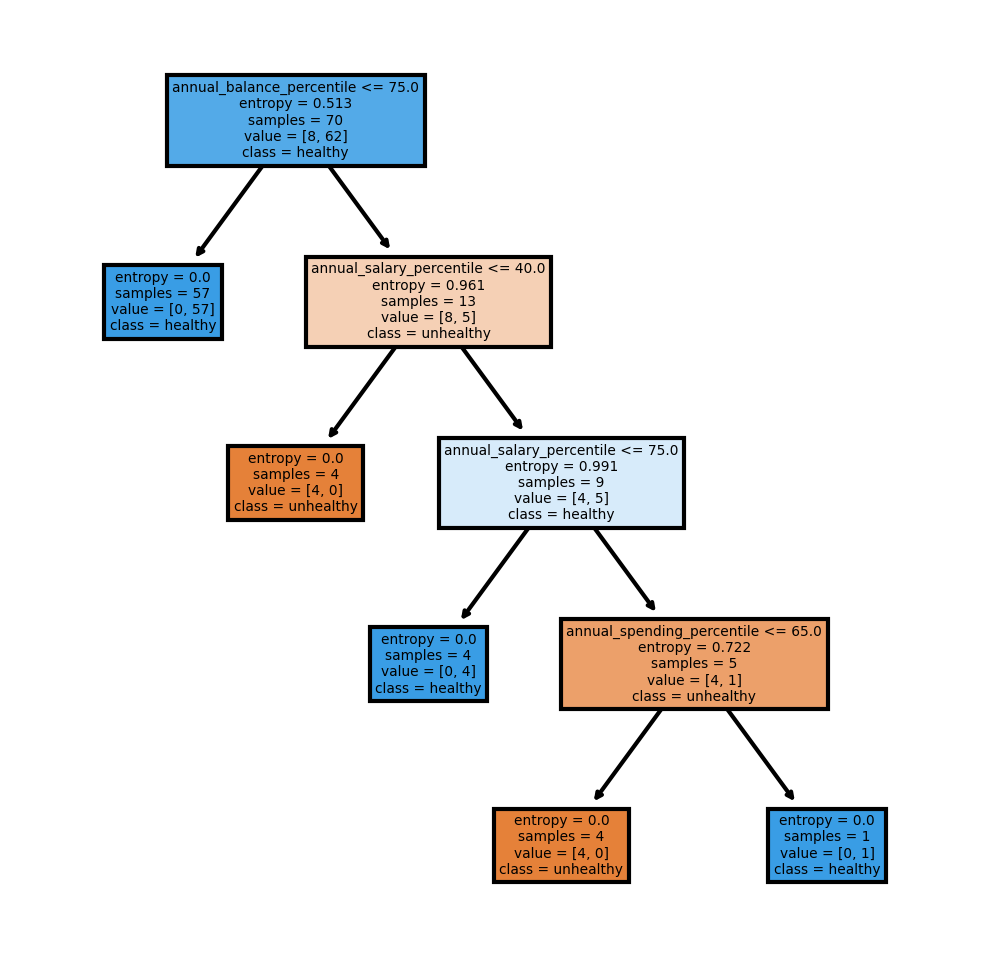

In [26]:
class_names=['unhealthy','healthy']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model, feature_names = feature_names,  class_names=class_names, filled = True);

### Confusion Matrix :

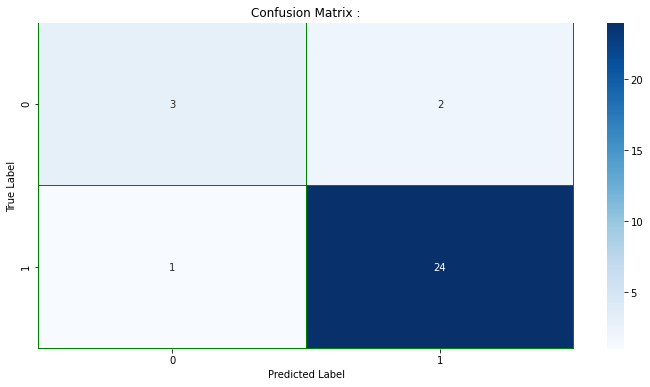

In [27]:
confusion_mtx = confusion_matrix(y_test, y_valid)
f,ax = plt.subplots(figsize=(12,6))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, cmap="Blues", linecolor="Green", fmt='.0f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix :")
plt.show()